# Movie reviews

This notebook takes you though a complete iteration of Machine Learning Assignment 1 - Movie reviews. The assignment details (including links to download the data) can be found [here](https://docs.google.com/document/d/1WGYw99e5q6j5V0Zrf2HveagU6URt_kVvdR8B9HYQ99E/edit?usp=sharing). 

In [19]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#YJ ADD
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

### IMPORTANT!!! Make sure you are using `BinaryClassificationPerformance` v1.02

In [20]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

# Function for feature building and extraction on natural language data

In [21]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

    # vectorize Bag of Words from review text; as sparse matrix
    if (not test): # fit_transform()
        hv = HashingVectorizer(n_features=2 ** 17, alternate_sign=False)
        X_hv = hv.fit_transform(movie_data.review)
        fitted_transformations.append(hv)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    else: # transform() 
        X_hv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    
    # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_hv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_hv)
    
    # create additional quantitative features
    # features from Amazon.csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    movie_data['punc_count'] = movie_data['review'].str.count("\.")

    X_quant_features = movie_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[2].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

# Create training and test sets from function

In [22]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='/Users/user/Desktop/ML/final_assignment_1/moviereviews_train.tsv', my_random_seed=9)
print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
The rate of 'good' movie reviews in the dataset: 
0.5
Shape of HashingVectorizer X:
(25000, 131072)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3         379           8
4         367           9


# Fit (and tune) Various Models

### MODEL: ordinary least squares

In [12]:
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss")
ols.fit(X_train, y_train)

ols_performance_train = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train')
ols_performance_train.compute_measures()
print(ols_performance_train.performance_measures)

{'Pos': 9953, 'Neg': 10047, 'TP': 7862, 'TN': 2134, 'FP': 7913, 'FN': 2091, 'Accuracy': 0.4998, 'Precision': 0.4983835182250396, 'Recall': 0.7899125891690948, 'desc': 'ols_train'}


### MODEL: SVM, linear

In [6]:
from sklearn import linear_model
svm = linear_model.SGDClassifier()
svm.fit(X_train, y_train)

svm_performance_train = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train')
svm_performance_train.compute_measures()
print(svm_performance_train.performance_measures)

NameError: name 'X_train' is not defined

### MODEL: logistic regression

In [7]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log')
lgs.fit(X_train, y_train)

lgs_performance_train = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train')
lgs_performance_train.compute_measures()
print(lgs_performance_train.performance_measures)

NameError: name 'X_train' is not defined

### MODEL: Naive Bayes

In [8]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)

nbs_performance_train = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train')
nbs_performance_train.compute_measures()
print(nbs_performance_train.performance_measures)

NameError: name 'X_train' is not defined

### MODEL: Perceptron

In [128]:
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron')
prc.fit(X_train, y_train)

prc_performance_train = BinaryClassificationPerformance(prc.predict(X_train), y_train, 'prc_train')
prc_performance_train.compute_measures()
print(prc_performance_train.performance_measures)

{'Pos': 9953, 'Neg': 10047, 'TP': 9953, 'TN': 10047, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'prc_train'}


### MODEL: Ridge Regression Classifier

In [23]:
from sklearn import linear_model
rdg_1 = linear_model.RidgeClassifier()
rdg_1.fit(X_train, y_train)

rdg_1_performance_train = BinaryClassificationPerformance(rdg_1.predict(X_train), y_train, 'rdg_1_train')
rdg_1_performance_train.compute_measures()
print(rdg_1_performance_train.performance_measures)

{'Pos': 9953, 'Neg': 10047, 'TP': 9953, 'TN': 10047, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_1_train'}


In [48]:
from sklearn import linear_model
rdg_10 = linear_model.RidgeClassifier(alpha=10)
rdg_10.fit(X_train, y_train)

rdg_10_performance_train = BinaryClassificationPerformance(rdg_10.predict(X_train), y_train, 'rdg_10_train')
rdg_10_performance_train.compute_measures()
print(rdg_10_performance_train.performance_measures)

{'Pos': 9953, 'Neg': 10047, 'TP': 9953, 'TN': 10047, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_10_train'}


In [49]:
from sklearn import linear_model
rdg_100 = linear_model.RidgeClassifier(alpha=100)
rdg_100.fit(X_train, y_train)

rdg_100_performance_train = BinaryClassificationPerformance(rdg_100.predict(X_train), y_train, 'rdg_100_train')
rdg_100_performance_train.compute_measures()
print(rdg_100_performance_train.performance_measures)

{'Pos': 9953, 'Neg': 10047, 'TP': 9953, 'TN': 10047, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_100_train'}


In [88]:
from sklearn import linear_model
rdg_500 = linear_model.RidgeClassifier(alpha=500)
rdg_500.fit(X_train, y_train)

rdg_500_performance_train = BinaryClassificationPerformance(rdg_500.predict(X_train), y_train, 'rdg_500_train')
rdg_500_performance_train.compute_measures()
print(rdg_500_performance_train.performance_measures)

{'Pos': 9953, 'Neg': 10047, 'TP': 9953, 'TN': 10047, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_500_train'}


In [81]:
from sklearn import linear_model
rdg_1000 = linear_model.RidgeClassifier(alpha=1000)
rdg_1000.fit(X_train, y_train)

rdg_1000_performance_train = BinaryClassificationPerformance(rdg_100.predict(X_train), y_train, 'rdg_1000_train')
rdg_1000_performance_train.compute_measures()
print(rdg_1000_performance_train.performance_measures)

{'Pos': 9953, 'Neg': 10047, 'TP': 9953, 'TN': 10047, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_1000_train'}


In [91]:
from sklearn import linear_model
rdg_5000 = linear_model.RidgeClassifier(alpha=5000)
rdg_5000.fit(X_train, y_train)

rdg_5000_performance_train = BinaryClassificationPerformance(rdg_100.predict(X_train), y_train, 'rdg_5000_train')
rdg_5000_performance_train.compute_measures()
print(rdg_5000_performance_train.performance_measures)

{'Pos': 9953, 'Neg': 10047, 'TP': 9953, 'TN': 10047, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_5000_train'}


In [50]:
from sklearn import linear_model
rdg_01 = linear_model.RidgeClassifier(alpha=0.1)
rdg_01.fit(X_train, y_train)

rdg_01_performance_train = BinaryClassificationPerformance(rdg_01.predict(X_train), y_train, 'rdg_01_train')
rdg_01_performance_train.compute_measures()
print(rdg_01_performance_train.performance_measures)

{'Pos': 9953, 'Neg': 10047, 'TP': 9953, 'TN': 10047, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_01_train'}


In [51]:
from sklearn import linear_model
rdg_001 = linear_model.RidgeClassifier(alpha=0.01)
rdg_001.fit(X_train, y_train)

rdg_001_performance_train = BinaryClassificationPerformance(rdg_001.predict(X_train), y_train, 'rdg_001_train')
rdg_001_performance_train.compute_measures()
print(rdg_001_performance_train.performance_measures)

{'Pos': 9953, 'Neg': 10047, 'TP': 9953, 'TN': 10047, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_001_train'}


In [5]:
rdg_10_performance_test = BinaryClassificationPerformance(rdg_10.predict(X_test), y_test, 'rdg_10_test')
rdg_10_performance_test.compute_measures()
print(rdg_10_performance_test.performance_measures)

NameError: name 'BinaryClassificationPerformance' is not defined

### MODEL: Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
rdf_1 = RandomForestClassifier(max_depth=2, random_state=0)
rdf_1.fit(X_train, y_train)

rdf_1_performance_train = BinaryClassificationPerformance(rdf.predict(X_train), y_train, 'rdf_1_train')
rdf_1_performance_train.compute_measures()
print(rdf_1_performance_train.performance_measures)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### ROC plot to compare performance of various models and fits

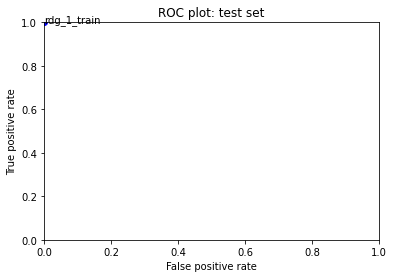

In [26]:
fits = [rdg_1_performance_train]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### looking at reviews based on their classification

Let's say we decide that Ordinary Least Squares (OLS) Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [132]:
ols_predictions = ols.predict(X_train)

### let's look at some false positives:

In [133]:
# false positives

print("Examples of false positives:")

import random, time

for i in range(0, len(ols_predictions)):
    if (ols_predictions[i] == 1):
        if (X_raw_train.iloc[i]['sentiment'] == 0):
            if (random.uniform(0, 1) < 0.05): # to print only 5% of the false positives
                print(i)
                print(X_raw_train.iloc[i]['review'])
                print('* * * * * * * * * ')


Examples of false positives:
140
I loved the first two movies, but this movie was just a waste of time and money (for me and the studio). I'm still wondering why they made this horrible movie. The thing with the plastic gun and with the toy car, that can go into another house are ridiculous. Joe Pesci and Daniel Stern in the first two movies were so funny, but the terrorists in this one are so stupid and not funny. Believe me this movie is just a waste of time.
* * * * * * * * * 
265
Sometimes, making something strange and contemporary doesn't always work to everyone's advantage. While I will admit that the set design and concept of the film was rather interesting, the execution of these ideas into one congruent story just didn't work. This film was so hideously slow and pointless, not even Robin Williams could save this garbage. It's obvious Barry Levinson's dream fell flat on its face, but he should have warned the rest of the world about this slop.
* * * * * * * * * 
394
Comedy Cent

9949
OK I'm not an American, but in my humble Scottish opinion Steve Martin is not, never has been, and never will be a funny man as long as our posteriors point in a southerly direction. Phil Silvers as Sergeant Bilko was a funny man, no doubt due to the skilled writers and directors and all the other talented team working characters in the series who contributed perfectly to one of the funniest and dateless situation comedies America has ever produced. How anyone could have the audacity to even attempt to replicate the Phil Silvers character is beyond me. To compound things the exercise was repeated in Martin's unfunny attempt to be Peter Seller's Inspector Clouseau, another abortive attempt, in my opinion, to rekindle a demonstrably unfunny career. Some of your contributers say 'Steve Martin puts his own stamp on the character', to that I would say 'balderdash' , his portrayals will be long forgotten when those of Silvers and Sellars will be treasured for generations to come
* * * *

18438
I seriously can't believe Tim Burton and Timur Bekmambetov, two people I LOVE, signed on to produce this crap. Tim Burton is a brilliant director, but to be honest I've been losing interest in him for a while since his last few movies were either remakes or adaptations. He did produce the brilliant \Nightmare Before Christmas\", which is one I've watched multiple times, and directed movies like \"Beetlejuice\" and \"Sleepy Hollow\", which are awesome films. Bekmambetov directed 3 films that I LOVE: Night Watch, Day Watch, and Wanted. I've only seen those three of his, but they prove he's an awesome director.<br /><br />Those two people producing one of the many reasons I was excited to see 9. So today I went to go see it at the theatre. I was so excited to finally have seen it. I had waited 7 months for the movie to come out.<br /><br />This movie is the first time I've walked out of a Tim Burton-related movie and said \"I enjoyed almost NONE of that\". I felt heartbroken to even

---

# <span style="color:red">WARNING: Don't look at test set performance too much!</span>

---

The following cells show performance on your test set. Do not look at this too often! 

# Look at performance on the test set

### MODEL: ordinary least squares

In [134]:
ols_performance_test = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test')
ols_performance_test.compute_measures()
print(ols_performance_test.performance_measures)

{'Pos': 2547, 'Neg': 2453, 'TP': 652, 'TN': 1927, 'FP': 526, 'FN': 1895, 'Accuracy': 0.5158, 'Precision': 0.5534804753820034, 'Recall': 0.25598743619945036, 'desc': 'ols_test'}


### MODEL: SVM, linear

In [135]:
svm_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, 'svm_test')
svm_performance_test.compute_measures()
print(svm_performance_test.performance_measures)

{'Pos': 2547, 'Neg': 2453, 'TP': 2159, 'TN': 2085, 'FP': 368, 'FN': 388, 'Accuracy': 0.8488, 'Precision': 0.854372774040364, 'Recall': 0.8476639183352964, 'desc': 'svm_test'}


### MODEL: logistic regression

In [136]:
lgs_performance_test = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test')
lgs_performance_test.compute_measures()
print(lgs_performance_test.performance_measures)

{'Pos': 2547, 'Neg': 2453, 'TP': 2160, 'TN': 2078, 'FP': 375, 'FN': 387, 'Accuracy': 0.8476, 'Precision': 0.8520710059171598, 'Recall': 0.8480565371024735, 'desc': 'lgs_test'}


### MODEL: Naive Bayes

In [137]:
nbs_performance_test = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test')
nbs_performance_test.compute_measures()
print(nbs_performance_test.performance_measures)

{'Pos': 2547, 'Neg': 2453, 'TP': 2083, 'TN': 2193, 'FP': 260, 'FN': 464, 'Accuracy': 0.8552, 'Precision': 0.8890311566367904, 'Recall': 0.817824892029839, 'desc': 'nbs_test'}


### MODEL: Perceptron

In [138]:
prc_performance_test = BinaryClassificationPerformance(prc.predict(X_test), y_test, 'prc_test')
prc_performance_test.compute_measures()
print(prc_performance_test.performance_measures)

{'Pos': 2547, 'Neg': 2453, 'TP': 2117, 'TN': 2095, 'FP': 358, 'FN': 430, 'Accuracy': 0.8424, 'Precision': 0.8553535353535353, 'Recall': 0.8311739301138594, 'desc': 'prc_test'}


### MODEL: Ridge Regression Classifier

In [113]:
rdg_performance_test = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test')
rdg_performance_test.compute_measures()
print(rdg_performance_test.performance_measures)

{'Pos': 2547, 'Neg': 2453, 'TP': 2090, 'TN': 2005, 'FP': 448, 'FN': 457, 'Accuracy': 0.819, 'Precision': 0.8234830575256107, 'Recall': 0.8205732234000785, 'desc': 'rdg_test'}


In [53]:
rdg_1_performance_test = BinaryClassificationPerformance(rdg_1.predict(X_test), y_test, 'rdg_1_test')
rdg_1_performance_test.compute_measures()
print(rdg_1_performance_test.performance_measures)

{'Pos': 2547, 'Neg': 2453, 'TP': 2090, 'TN': 2005, 'FP': 448, 'FN': 457, 'Accuracy': 0.819, 'Precision': 0.8234830575256107, 'Recall': 0.8205732234000785, 'desc': 'rdg_1_test'}


In [54]:
rdg_10_performance_test = BinaryClassificationPerformance(rdg_10.predict(X_test), y_test, 'rdg_10_test')
rdg_10_performance_test.compute_measures()
print(rdg_10_performance_test.performance_measures)

{'Pos': 2547, 'Neg': 2453, 'TP': 2092, 'TN': 2006, 'FP': 447, 'FN': 455, 'Accuracy': 0.8196, 'Precision': 0.8239464356045687, 'Recall': 0.8213584609344327, 'desc': 'rdg_10_test'}


In [55]:
rdg_100_performance_test = BinaryClassificationPerformance(rdg_100.predict(X_test), y_test, 'rdg_100_test')
rdg_100_performance_test.compute_measures()
print(rdg_100_performance_test.performance_measures)

{'Pos': 2547, 'Neg': 2453, 'TP': 2103, 'TN': 2018, 'FP': 435, 'FN': 444, 'Accuracy': 0.8242, 'Precision': 0.8286052009456265, 'Recall': 0.8256772673733804, 'desc': 'rdg_100_test'}


In [89]:
rdg_500_performance_test = BinaryClassificationPerformance(rdg_500.predict(X_test), y_test, 'rdg_500_test')
rdg_500_performance_test.compute_measures()
print(rdg_500_performance_test.performance_measures)

{'Pos': 2547, 'Neg': 2453, 'TP': 2118, 'TN': 2042, 'FP': 411, 'FN': 429, 'Accuracy': 0.832, 'Precision': 0.8374851720047449, 'Recall': 0.8315665488810365, 'desc': 'rdg_500_test'}


In [83]:
rdg_1000_performance_test = BinaryClassificationPerformance(rdg_1000.predict(X_test), y_test, 'rdg_1000_test')
rdg_1000_performance_test.compute_measures()
print(rdg_1000_performance_test.performance_measures)

{'Pos': 2547, 'Neg': 2453, 'TP': 2140, 'TN': 2055, 'FP': 398, 'FN': 407, 'Accuracy': 0.839, 'Precision': 0.843183609141056, 'Recall': 0.8402041617589321, 'desc': 'rdg_1000_test'}


In [92]:
rdg_5000_performance_test = BinaryClassificationPerformance(rdg_5000.predict(X_test), y_test, 'rdg_5000_test')
rdg_5000_performance_test.compute_measures()
print(rdg_5000_performance_test.performance_measures)

{'Pos': 2547, 'Neg': 2453, 'TP': 2204, 'TN': 2112, 'FP': 341, 'FN': 343, 'Accuracy': 0.8632, 'Precision': 0.8660117878192535, 'Recall': 0.8653317628582646, 'desc': 'rdg_5000_test'}


In [56]:
rdg_01_performance_test = BinaryClassificationPerformance(rdg_01.predict(X_test), y_test, 'rdg_01_test')
rdg_01_performance_test.compute_measures()
print(rdg_01_performance_test.performance_measures)

{'Pos': 2547, 'Neg': 2453, 'TP': 2090, 'TN': 2004, 'FP': 449, 'FN': 457, 'Accuracy': 0.8188, 'Precision': 0.82315872390705, 'Recall': 0.8205732234000785, 'desc': 'rdg_01_test'}


In [57]:
rdg_001_performance_test = BinaryClassificationPerformance(rdg_001.predict(X_test), y_test, 'rdg_001_test')
rdg_001_performance_test.compute_measures()
print(rdg_001_performance_test.performance_measures)

{'Pos': 2547, 'Neg': 2453, 'TP': 2089, 'TN': 2005, 'FP': 448, 'FN': 458, 'Accuracy': 0.8188, 'Precision': 0.8234134804887663, 'Recall': 0.8201806046329014, 'desc': 'rdg_001_test'}


### MODEL: Random Forest Classifier

In [140]:
rdf1_performance_test = BinaryClassificationPerformance(rdf.predict(X_test), y_test, 'rdf_test')
rdf1_performance_test.compute_measures()
print(rdf_performance_test.performance_measures)

{'Pos': 2547, 'Neg': 2453, 'TP': 1259, 'TN': 2094, 'FP': 359, 'FN': 1288, 'Accuracy': 0.6706, 'Precision': 0.7781211372064277, 'Recall': 0.49430702787593245, 'desc': 'rdf_test'}


### ROC plot to compare performance of various models and fits

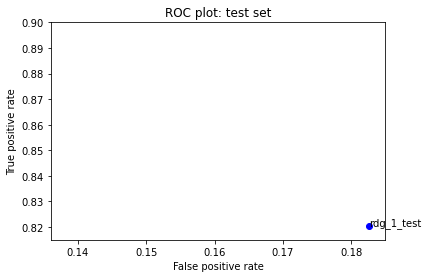

In [106]:
fits = [rdg_1_performance_test]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0.136, 0.185, 0.815, 0.9])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

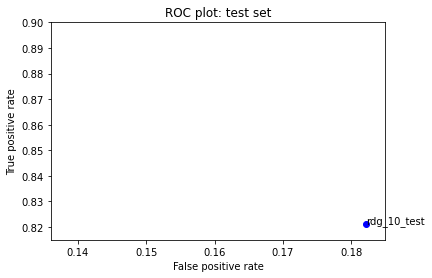

In [107]:
fits = [rdg_10_performance_test]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0.136, 0.185, 0.815, 0.9])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

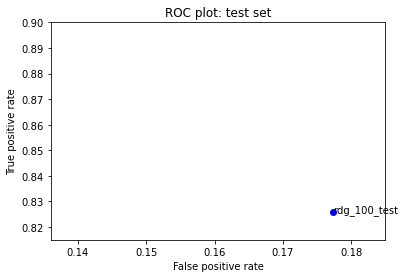

In [108]:
fits = [rdg_100_performance_test]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0.136, 0.185, 0.815, 0.9])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

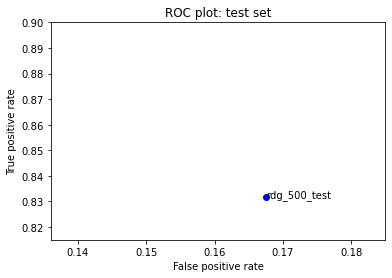

In [109]:
fits = [rdg_500_performance_test]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0.136, 0.185, 0.815, 0.9])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

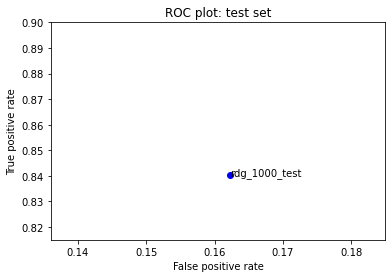

In [110]:
fits = [rdg_1000_performance_test]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0.136, 0.185, 0.815, 0.9])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

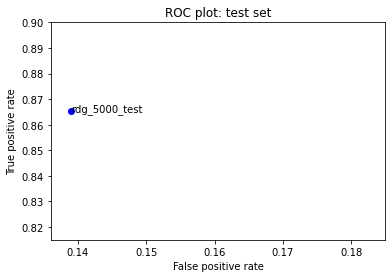

In [111]:
fits = [rdg_5000_performance_test]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0.136, 0.185, 0.815, 0.9])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

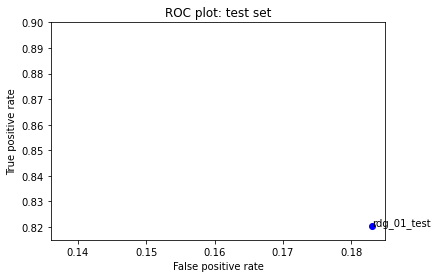

In [115]:
fits = [rdg_01_performance_test]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0.136, 0.185, 0.815, 0.9])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

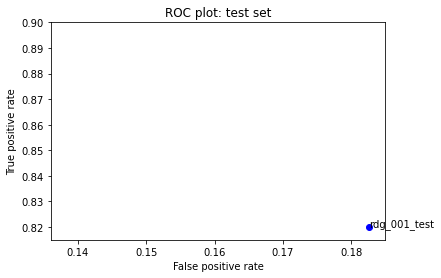

In [116]:
fits = [rdg_001_performance_test]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0.136, 0.185, 0.815, 0.9])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

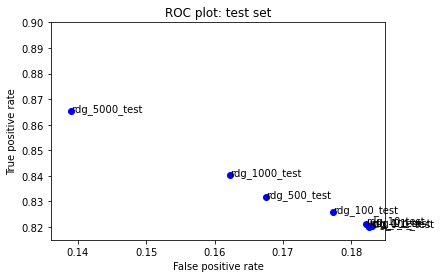

In [99]:
fits = [rdg_1_performance_test, rdg_10_performance_test, rdg_100_performance_test, rdg_500_performance_test, rdg_1000_performance_test, rdg_5000_performance_test, rdg_01_performance_test, rdg_001_performance_test,]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0.136, 0.185, 0.815, 0.9])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

---

# <span style="color:red">SUBMISSION</span>

---

In [25]:
# read in test data for submission
# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
raw_data, X_test_submission = process_raw_data(fn='/Users/user/Desktop/ML/final_assignment_1/moviereviews_test.tsv', my_random_seed=9, test=True)
print("Number of rows in the submission test set (should be 25,000): ")

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 2 columns 

the data types for each of the columns in movie_data:
id        object
review    object
dtype: object 

the first 10 rows in movie_data:
         id                                             review
0  12311_10  Naturally in a film who's main themes are of m...
1    8348_2  This movie is a disaster within a disaster fil...
2    5828_4  All in all, this is a movie for kids. We saw i...
3    7186_2  Afraid of the Dark left me with the impression...
4   12128_7  A very accurate depiction of small time mob li...
Shape of CountVectorizer X:
(25000, 6912851)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         131           5
1         169          15
2         176          18
3         112           5
4         133           8
5         331          20
6         121          18
7         230          22
8          59           3
9         224          14
Size 

---

Choose a <span style="color:red">*single*</span> model for your submission. In this code, I am choosing the Ordinary Least Squares model fit, which is in the `ols` object. But you should choose the model that is performing the best for you! 

In [142]:
# store the id from the raw data
my_submission = pd.DataFrame(raw_data["id"])
# concatenate predictions to the id
my_submission["prediction"] = nbs.predict(X_test_submission) #change
# look at the proportion of positive predictions
print(my_submission['prediction'].mean())

ValueError: dimension mismatch

In [27]:
raw_data.head()

,id,review,word_count,punc_count
0,12311_10,Naturally in a film who's main themes are of m...,131,5
1,8348_2,This movie is a disaster within a disaster fil...,169,15
2,5828_4,"All in all, this is a movie for kids. We saw i...",176,18
3,7186_2,Afraid of the Dark left me with the impression...,112,5
4,12128_7,A very accurate depiction of small time mob li...,133,8


In [28]:
my_submission.head()

,id,prediction
0,12311_10,1
1,8348_2,1
2,5828_4,0
3,7186_2,1
4,12128_7,0


In [29]:
my_submission.shape

(25000, 2)

In [31]:
# export submission file as pdf
# CHANGE FILE PATH: 
my_submission.to_csv('/Users/user/Desktop/ML/final_assignment_1/moviereviews_submission.csv', index=False)

# Submit to Canvas: 1) the CSV file that was written in the previous cell and 2) the url to the repository (GitHub or other) that contains your code and documentation